# Problem Statement

Aim of this exercise is to get initial insights of the Wine quality dataset and develop a predictor model using Decision Tree.

### Methodology
Decision tree model development is divided into multiple steps as mentioned below,
- Data exploring and understanding: This step involves preliminary level data understanding and exploring.
- Data Cleaning: This step includes cleaning the existing data. We check the data for any missing values and treat them as per the requirements. We also need to look for constant value colulmns as that is not going to add any additional value to out analysis. Sometimes columns with very high proportion of any particular value also doesn't add any values. Hence, getting rid of them helps with further analysis.
- Data Visualization: This step involves visualizing our dataset and check for relationship amongst independent variables. We can also reduce some feature columns here but it should not be aggressive.
- Data Preparation: This step is mainly usefull for feeding in the data into the model. It involves steps like creating dummy variables, scaling etc. depending upond the data type.
- Train-test split: This step involves spliting the dataset into train and test parts.
- Model Development-validation and evaluaiton: This steps involves training the model and validate it. It involves evaluating the model using relevant matrics.
- Conclusion/Recommendation: It involves drawing conclusions and recommendations to business.

### Importing Dependancies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

### Reading Dataset

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observations,
- Data is having 11 feature columns and one output variable column. It includes total 1599 data entries.
- There aren't any null values in the dataset.
- All the feature columns are float64 types.

## 1. Data Exploration and Understanding

In [4]:
# Splitting into X and y

X = data.drop('quality', axis=1)
y = data['quality']

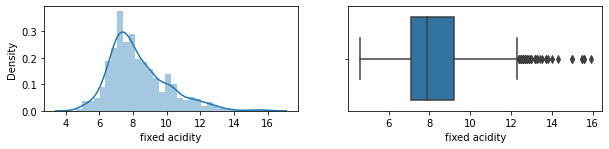

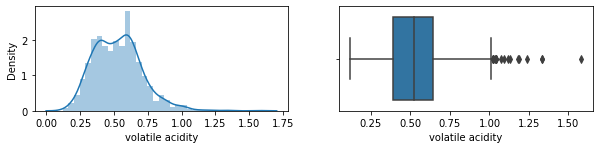

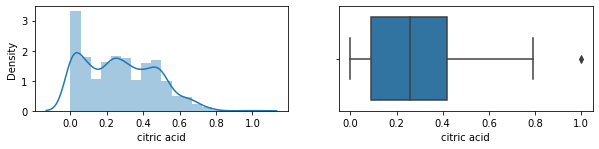

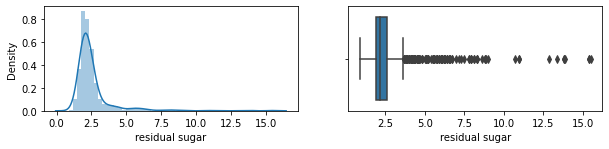

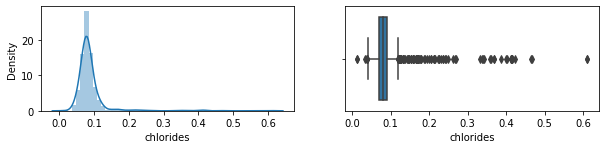

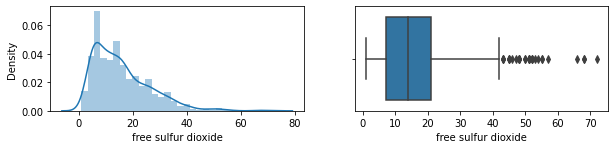

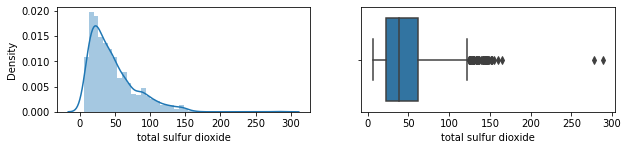

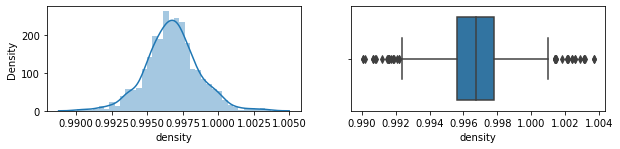

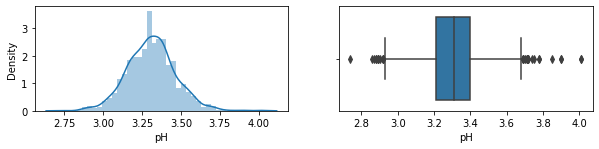

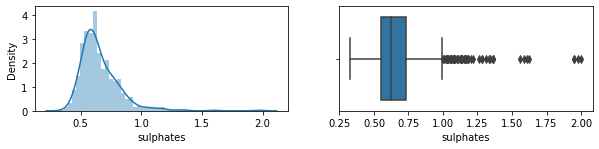

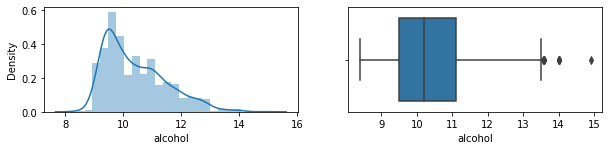

In [5]:
# checking distrubution of each feature (X variables)


for i, feat in enumerate(X.columns):
    plt.subplots(figsize=(10,25))
    plt.subplot(X.shape[1],2,(2*i+1))
    sns.distplot(data[feat])
    plt.subplot(X.shape[1],2,(2*i+2))
    sns.boxplot(data[feat])

Observations,
- 'fixed acidity' is having near normal distribution with median value ~8 units. Soma outliers can be observed.
- 'volatile acidity' is having range from 0 to 1 units and median value ~0.25 units. Soma outliers can be observed.
- 'residual sugar' is having very high number of outlier values. The distribution is concentrated near 0 to 5 and whole range is from 0 to 15.
- 'chlorides' is having very high number of outlier values. The distribution is concentrated near 0 to 0.2 and whole range is from 0 to 0.6.
- 'free sulfur dioxied' is having few outliers with median value of ~40 units.
- 'density' is having normal distribution with median value of 0.007 units.
- 'pH' value is having near normal distribution with median value of 3.3.
- 'sulphates' is having high number of outlier values.
- 'alcohol' is having few outlier but distributed mainly between 8-14.

In [6]:
# checking distrubution of output variable (y)

y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

- Output variable (quality) is having major portion of classes 5, 6, and 7. 
- There are no data entries belong to 1, 2, 9 and 10.

We can use decision tree classifier to solve this problem. 

## 2. Data Cleaning

The data is already clean and clear. Hence, we do not need any form of data cleaning step here.

## 3. Data Visualization

<AxesSubplot:>

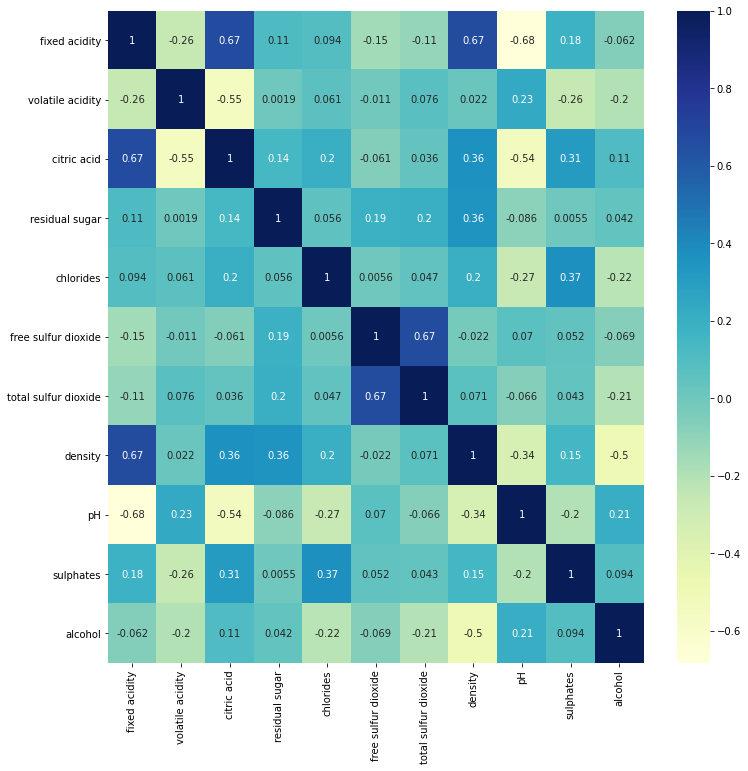

In [7]:
# Pearson's correlation


# heatmap
plt.subplots(figsize=(12,12))
sns.heatmap(data.drop('quality', axis=1).corr(), annot=True, cmap='YlGnBu')

Observation,
- There isn't any strong correlation between numeric feature columns and output variable.
- Some features have negative correlaton amongst them.

## 4. Data Preparation

Note:

- We don't require dummy variables as data is in numeric format.
- Tree based models do not require data to be scaled as they are not sensitive to the variance in the data. Hence, we would not any kind of scaling of data. 

## 5. Train-Test split

In [8]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100,
                                     stratify = y)


# reshaping y data
y_train = y_train
y_test = y_test

## 6. Model Development - Validation and Evaluation

#### Model development using default parameters

In [9]:
# model development

model1 = DecisionTreeClassifier()

model1.fit(X_train, y_train)

# prediction
y_pred_train1 = model1.predict(X_train)
y_pred_test1 = model1.predict(X_test)

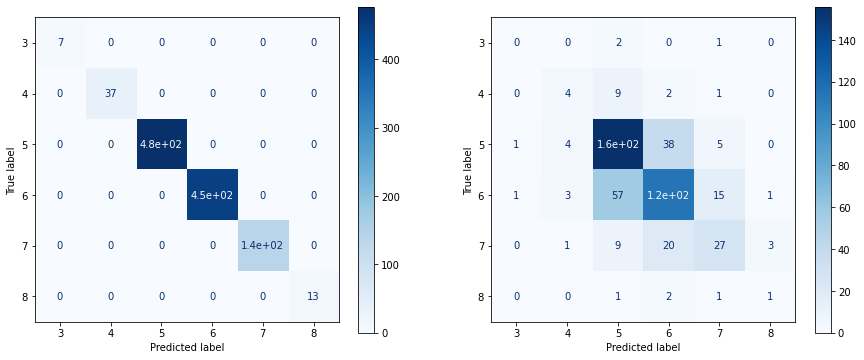

In [10]:
# confusion matrix: train  and test sets

plt.figure(figsize=(15, 6))
ax1 = plt.subplot(1,2,1)
plot_confusion_matrix(model1, X_train, y_train, labels=np.unique(y_train), cmap=plt.cm.Blues, ax=ax1)

ax2 = plt.subplot(1,2,2)
plot_confusion_matrix(model1, X_test, y_test, labels=np.unique(y_test), cmap=plt.cm.Blues, ax=ax2)


In [11]:
# classification report

# train
print(classification_report(y_train, y_pred_train1))

print(' ')

# test
print(classification_report(y_test, y_pred_test1))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1.00       446
           7       1.00      1.00      1.00       139
           8       1.00      1.00      1.00        13

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.33      0.25      0.29        16
           5       0.67      0.76      0.71       204
           6       0.65      0.60      0.62       192
           7       0.54      0.45      0.49        60
           8       0.20      0.20      0.20         5

    accuracy                           0.63       480
   macro avg       0.

Observation,

- Model is clearly overfitting to the training dataset.
- This is a very common challenge with decision tress models. Hence, we would be doing hyper parameter tuning.

#### Hyper-parameter tuning and model development

Parameters to tune:
- max_dept: maximum allowable depth in the tree
- min_samples_split: min number of samples required to split further
- min_samples_leaf: min number of samples in each leaf

Further read: https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

In [12]:
# parameters grid
params = {'max_depth': np.arange(2, 6, 1),     
          'min_samples_split': np.arange(2, 15, 2),   
          'min_samples_leaf': np.arange(1, 15, 2)}  

model2 = DecisionTreeClassifier()

# cross validation
folds = 5
model_cv = RandomizedSearchCV(estimator = model2, 
                        param_distributions = params,
                        n_iter = 500,
                        scoring= 'accuracy',
                        n_jobs = -1,
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)    


model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 196 candidates, totalling 980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 980 out of 980 | elapsed:    4.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [13]:
# Best hyper parameter value after randomsearch
print(model_cv.best_params_)

{'min_samples_split': 2, 'min_samples_leaf': 11, 'max_depth': 5}


In [15]:
# Checking performance variation with parameter value

cv_res = pd.DataFrame(model_cv.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007958,0.001270,0.004175,0.001787,2,1,2,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.553571,0.500000,...,0.547806,0.038595,99,0.572067,0.584358,0.575419,0.553073,0.571429,0.571269,0.010201
1,0.004942,0.000477,0.001972,0.000399,4,1,2,"{'min_samples_split': 4, 'min_samples_leaf': 1...",0.553571,0.500000,...,0.547806,0.038595,99,0.572067,0.584358,0.575419,0.553073,0.571429,0.571269,0.010201
2,0.004524,0.000577,0.002028,0.000155,6,1,2,"{'min_samples_split': 6, 'min_samples_leaf': 1...",0.553571,0.500000,...,0.547806,0.038595,99,0.572067,0.584358,0.575419,0.553073,0.571429,0.571269,0.010201
3,0.003883,0.000514,0.001728,0.000319,8,1,2,"{'min_samples_split': 8, 'min_samples_leaf': 1...",0.553571,0.500000,...,0.547806,0.038595,99,0.572067,0.584358,0.575419,0.553073,0.571429,0.571269,0.010201
4,0.003432,0.000276,0.001645,0.000198,10,1,2,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.553571,0.500000,...,0.547806,0.038595,99,0.572067,0.584358,0.575419,0.553073,0.571429,0.571269,0.010201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0.006408,0.000485,0.001603,0.000266,6,13,5,"{'min_samples_split': 6, 'min_samples_leaf': 1...",0.580357,0.522321,...,0.559453,0.025714,33,0.650279,0.669274,0.652514,0.653631,0.645089,0.654158,0.008109
192,0.007134,0.002158,0.002004,0.000551,8,13,5,"{'min_samples_split': 8, 'min_samples_leaf': 1...",0.580357,0.522321,...,0.559453,0.025714,33,0.650279,0.669274,0.652514,0.653631,0.645089,0.654158,0.008109
193,0.003928,0.000050,0.000959,0.000034,10,13,5,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.580357,0.522321,...,0.559453,0.025714,33,0.650279,0.669274,0.652514,0.653631,0.645089,0.654158,0.008109
194,0.005382,0.001287,0.001663,0.000671,12,13,5,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.580357,0.522321,...,0.559453,0.025714,33,0.650279,0.669274,0.652514,0.653631,0.645089,0.654158,0.008109


<AxesSubplot:xlabel='param_max_depth', ylabel='mean_test_score'>

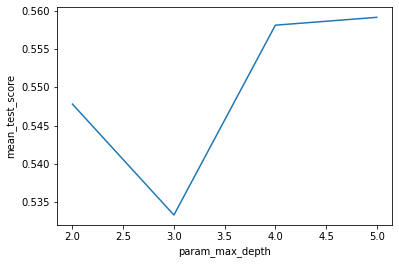

In [17]:
# plotting cv test accuracy Vs max_depth

# pivot table around param_max_depth
table_C = pd.pivot_table(data = cv_res, values='mean_test_score', index='param_max_depth').reset_index()

sns.lineplot(x=table_C.param_max_depth, y= table_C.mean_test_score)

<AxesSubplot:xlabel='param_min_samples_split', ylabel='mean_test_score'>

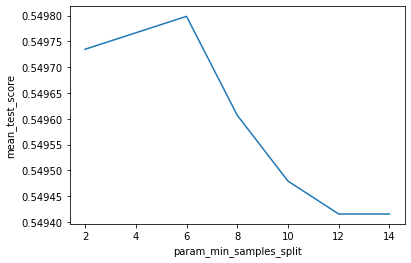

In [18]:
# plotting cv test accuracy Vs min_samples_split

# pivot table around param_min_samples_split
table_C = pd.pivot_table(data = cv_res, values='mean_test_score', index='param_min_samples_split').reset_index()

sns.lineplot(x=table_C.param_min_samples_split, y= table_C.mean_test_score)

<AxesSubplot:xlabel='param_min_samples_leaf', ylabel='mean_test_score'>

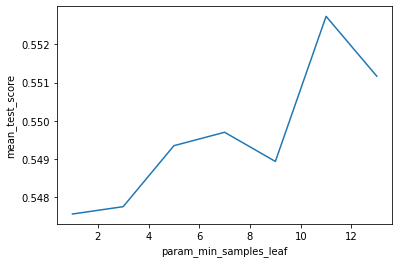

In [19]:
# plotting cv test accuracy Vs min_samples_leaf

# pivot table around param_min_samples_leaf
table_C = pd.pivot_table(data = cv_res, values='mean_test_score', index='param_min_samples_leaf').reset_index()

sns.lineplot(x=table_C.param_min_samples_leaf, y= table_C.mean_test_score)

In [20]:
# model development using best features

model3 = DecisionTreeClassifier(max_depth = model_cv.best_params_['max_depth'],
                               min_samples_leaf = model_cv.best_params_['min_samples_leaf'],
                               min_samples_split = model_cv.best_params_['min_samples_split'])

model3.fit(X_train, y_train)

# prediction
y_pred_train3 = model3.predict(X_train)
y_pred_test3 = model3.predict(X_test)

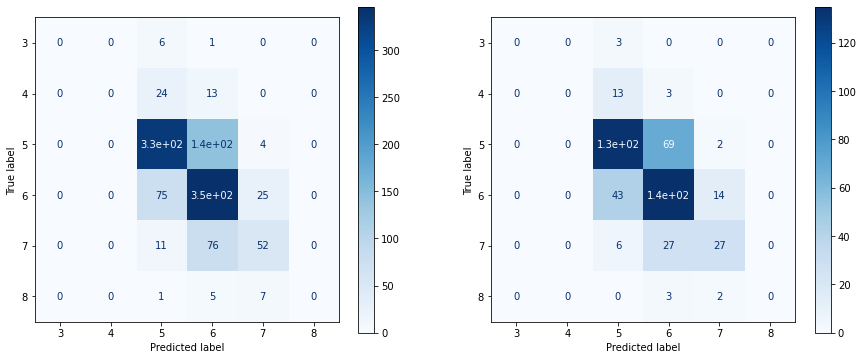

In [21]:
# confusion matrix: train  and test sets

plt.figure(figsize=(15, 6))
ax1 = plt.subplot(1,2,1)
plot_confusion_matrix(model3, X_train, y_train, labels=np.unique(y_train), cmap=plt.cm.Blues, ax=ax1)

ax2 = plt.subplot(1,2,2)
plot_confusion_matrix(model3, X_test, y_test, labels=np.unique(y_test), cmap=plt.cm.Blues, ax=ax2)

In [22]:
# classification report

# train
print(classification_report(y_train, y_pred_train3))

print(' ')

# test
print(classification_report(y_test, y_pred_test3))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        37
           5       0.74      0.70      0.72       477
           6       0.59      0.78      0.67       446
           7       0.59      0.37      0.46       139
           8       0.00      0.00      0.00        13

    accuracy                           0.65      1119
   macro avg       0.32      0.31      0.31      1119
weighted avg       0.63      0.65      0.63      1119

 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.67      0.65      0.66       204
           6       0.57      0.70      0.63       192
           7       0.60      0.45      0.51        60
           8       0.00      0.00      0.00         5

    accuracy                           0.61       480
   macro avg       0.

Observations,
- Train and test accuracy values are near to each other. Hence model is not overfitting.
- Here we would be considering weighted values for precision, recall and f1 score since the dataset is skewed. The corresponding values are near 0.6 or above in both train and test cases.

#### Tree Visualization and comparison

In [23]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

features = list(X.columns[0:])
dot_data1 = StringIO()  
export_graphviz(model1, out_file=dot_data1,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data1.getvalue())  
graph.write_pdf("dec_tree.pdf")

dot_data2 = StringIO()
export_graphviz(model3, out_file=dot_data2,
                feature_names=features, filled=True,rounded=True)

graph1 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
graph1.write_pdf("dec_tree_tuned.pdf")

True

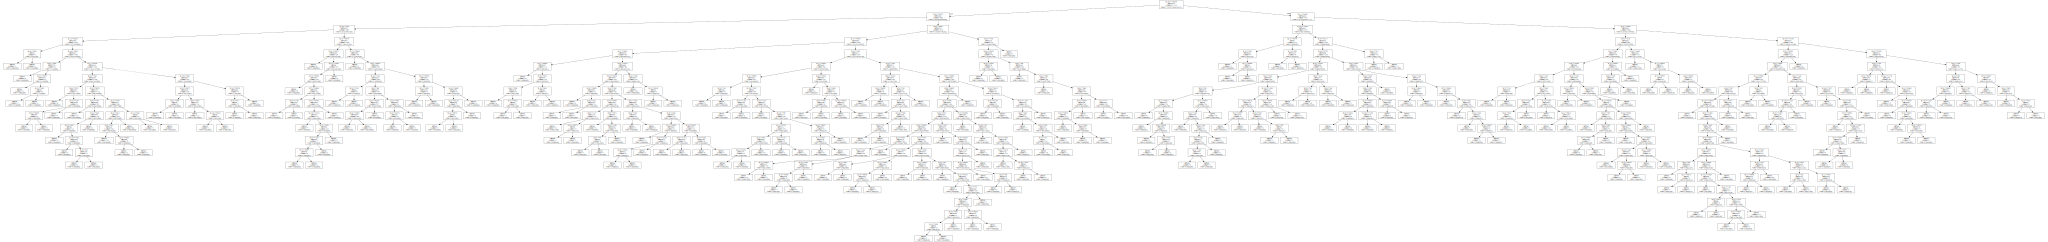

In [31]:
from IPython.display import display
display(graphviz.Source(export_graphviz(model1)))